In [1]:
import pandas as pd
import os
print(os.listdir('data/'))

['test.csv', 'train.csv', 'trainLabels.csv']


In [2]:
train = pd.read_csv('data/train.csv',header=None)
trainLabels = pd.read_csv('data/trainLabels.csv',header=None)
test = pd.read_csv('data/test.csv',header=None)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [4]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [5]:
train.shape, trainLabels.shape, test.shape

((1000, 40), (1000, 1), (9000, 40))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, trainLabels, test_size=0.25,random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 40), (250, 40), (750, 1), (250, 1))

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [8]:
#Logistic
estimator = LogisticRegression()
print(f'Logistic:{cross_val_score(estimator, X_train, y_train.values.ravel(), cv=5).mean()}')

#DecisionTree
estimator = DecisionTreeClassifier()
print(f'DecisionTree:{cross_val_score(estimator, X_train, y_train.values.ravel(), cv=5).mean()}')

#RandomForest
estimator = RandomForestClassifier()
print(f'RandomForest:{cross_val_score(estimator, X_train, y_train.values.ravel(), cv=5).mean()}')

#GradientBoosting
estimator = GradientBoostingClassifier()
print(f'GradientBoosting:{cross_val_score(estimator, X_train, y_train.values.ravel(), cv=5).mean()}')


Logistic:0.8066666666666666
DecisionTree:0.7853333333333333
RandomForest:0.8546666666666667
GradientBoosting:0.8559999999999999


In [9]:
from sklearn.preprocessing import MinMaxScaler
MMEncoder = MinMaxScaler()
MM_X_train = MMEncoder.fit_transform(X_train)

In [10]:
#Logistic
estimator = LogisticRegression()
print(f'Logistic:{cross_val_score(estimator, MM_X_train, y_train.values.ravel(), cv=5).mean()}')

#DecisionTree
estimator = DecisionTreeClassifier()
print(f'DecisionTree:{cross_val_score(estimator, MM_X_train, y_train.values.ravel(), cv=5).mean()}')

#RandomForest
estimator = RandomForestClassifier()
print(f'RandomForest:{cross_val_score(estimator, MM_X_train, y_train.values.ravel(), cv=5).mean()}')

#GradientBoosting
estimator = GradientBoostingClassifier()
print(f'GradientBoosting:{cross_val_score(estimator, MM_X_train, y_train.values.ravel(), cv=5).mean()}')


Logistic:0.8200000000000001
DecisionTree:0.776
RandomForest:0.8693333333333333
GradientBoosting:0.8586666666666666


<function matplotlib.pyplot.show(*args, **kw)>

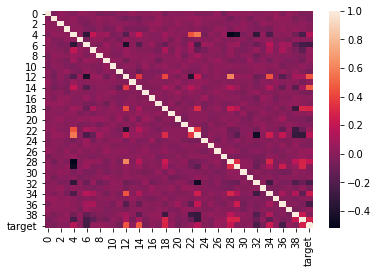

In [11]:
#檢查feature間的關聯係數
import seaborn as sns
import matplotlib.pyplot as plt
crr_train = train
crr_train['target'] = trainLabels
corr = crr_train.corr()
sns.heatmap(corr)
plt.show

In [12]:
corr['target']

0        -0.028058
1        -0.052153
2        -0.005618
3        -0.007439
4         0.150652
5         0.015151
6        -0.252976
7         0.040523
8         0.037534
9         0.026841
10       -0.010233
11       -0.075276
12        0.460738
13        0.018214
14        0.476171
15       -0.060556
16        0.012234
17       -0.018021
18        0.289508
19        0.046036
20       -0.075135
21       -0.018645
22        0.046953
23        0.172938
24       -0.017121
25       -0.036663
26        0.064633
27        0.019778
28        0.207949
29       -0.012022
30       -0.015797
31        0.012458
32       -0.227027
33       -0.053928
34        0.236116
35        0.012533
36       -0.231733
37        0.039376
38       -0.019690
39        0.264656
target    1.000000
Name: target, dtype: float64

In [13]:
high_list = list(corr[(corr['target']>0.05) | (corr['target']<-0.05)].index)
high_list.pop(-1)
print(high_list)

[1, 4, 6, 11, 12, 14, 15, 18, 20, 23, 26, 28, 32, 33, 34, 36, 39]


In [14]:
new_X_train = X_train[high_list]

#Logistic
estimator = LogisticRegression()
print(f'Logistic:{cross_val_score(estimator, new_X_train, y_train.values.ravel(), cv=5).mean()}')

#DecisionTree
estimator = DecisionTreeClassifier()
print(f'DecisionTree:{cross_val_score(estimator, new_X_train, y_train.values.ravel(), cv=5).mean()}')

#RandomForest
estimator = RandomForestClassifier()
print(f'RandomForest:{cross_val_score(estimator, new_X_train, y_train.values.ravel(), cv=5).mean()}')

#GradientBoosting
estimator = GradientBoostingClassifier()
print(f'GradientBoosting:{cross_val_score(estimator, new_X_train, y_train.values.ravel(), cv=5).mean()}')

Logistic:0.8240000000000001
DecisionTree:0.7893333333333333
RandomForest:0.8453333333333333
GradientBoosting:0.8573333333333333


不論是用MinMaxScaler或挑選關聯係數較高的feature來做 雖然Logistic分數提升 但對RandomForest和GradientBoosting影響不大(甚至可能下降)

In [15]:
from sklearn.metrics import accuracy_score

In [24]:
#用原始資料集訓練RandomForest和GradientBoosting模型
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train.values.ravel())
y_pred = rfc_model.predict(X_test)
print(f'RandomForestClassifier:{accuracy_score(y_test ,y_pred)}')

GDBC_model = GradientBoostingClassifier()
GDBC_model.fit(X_train, y_train.values.ravel())
y_pred = GDBC_model.predict(X_test)
print(f'GradientBoosting:{accuracy_score(y_test ,y_pred)}')

RandomForestClassifier:0.824
GradientBoosting:0.848


In [35]:
pred = GDBC_model.predict(test)
submit = pd.DataFrame(pred, columns=['Solution'])
submit['Id'] = submit.index+1
submit

,Solution,Id
0,1,1
1,0,2
2,1,3
3,0,4
4,0,5
...,...,...
8995,1,8996
8996,1,8997
8997,1,8998
8998,0,8999


In [36]:
submit.to_csv('test1.csv',index=False)

In [11]:
#from sklearn.metrics import accuracy_score

#Logistic
# lr_model = LogisticRegression()
# lr_model.fit(X_train, y_train.values.ravel())
# y_pred = lr_model.predict(X_test)
# print(f'Logistic:{accuracy_score(y_test ,y_pred)}')

#DecisionTree
# dtree_model = DecisionTreeClassifier()
# dtree_model.fit(X_train, y_train.values.ravel())
# y_pred = dtree_model.predict(X_test)
# print(f'DecisionTree:{accuracy_score(y_test ,y_pred)}')

#RandomForest
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train.values.ravel())
y_pred = rfc_model.predict(X_test)
print(f'RandomForestClassifier:{accuracy_score(y_test ,y_pred)}')

#GradientBoosting
# GDBC_model = GradientBoostingClassifier()
# GDBC_model.fit(X_train, y_train.values.ravel())
# y_pred = GDBC_model.predict(X_test)
# print(f'GradientBoosting:{accuracy_score(y_test ,y_pred)}')

Logistic:0.79
DecisionTree:0.73
RandomForestClassifier:0.83
GradientBoosting:0.83
